<a href="https://colab.research.google.com/github/ciencialatitud0/EPIC_2/blob/main/Day3/Astrophysics/Observationl_astronomy/3D_data_cubes_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Working with a 3D data cube (Astrophysics)

requirements: astropy, numpy, matplotlib

contents:
- reading in fits data cubes (3D spectral line data - HI data of a galaxy)
- plotting slices of the 3D data cube
- downloading astronomical images from a database (for the same galaxy as the HI data)
- making an overlay of the HI data onto an optical image
- Plotting the HI spectrum of a galaxy
- calculating the HI mass of a galaxy
- making moment maps

## Resources
- Google is your best friend. If you have coding questions, it is likely that someone also had the same question before and there are answers online.
- The documentation of the different python packages, e.g. matplotlib, numpy, astropy is good. You can find a lot of useful information there.
- stackoverflow is a website where people can ask questions of the community. There are generally good solutions there to problems.
- The astropy website has several tutorials and examples that can help you to learn how to do plots and calculations with the package: https://learn.astropy.org/
- There are also several other websites with various free python tutorials

- A collection of lecture notes on Radio astronomy: https://science.nrao.edu/opportunities/courses/era This is a very good resource to learn more about radio astronomy
- usefull information on the spectral lines in general: https://www.cv.nrao.edu/~sransom/web/Ch7.html#E155 This has all the relevant equations

In [ ]:
# this installs the relevant packages once uncommented

#! pip install reproject
#! pip install astroquery
#! pip install spectral_cube

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np

import matplotlib.pyplot as plt

from astropy.io import fits
from astropy import units as u
from astropy.coordinates import SkyCoord
from astropy.wcs import WCS

from reproject import reproject_interp

from astroquery.skyview import SkyView
from astroquery.vizier import Vizier

from spectral_cube import SpectralCube

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Read in the data file (fits file)
The data used in this tutorial is the publicly available data from the VIVA (VLA Imaging of Virgo in Atomic gas) Survey: http://www.astro.yale.edu/viva/

In particular, the tutarial is using data for the galaxy NGC 4192 (also known as Messier 98). The data is available from here: http://www.astro.yale.edu/cgi-bin/viva/galaxy.cgi?ngc4192

We are using this data because the 3D data cubes are relatively small (~20MB) from this survey. The newer HI data cubes can be several hundreds of MB, or if they contain more galaxies then even several GB.

In [ ]:
directory = '/content/drive/My Drive/Colab Notebooks/'

file = directory+'/ngc4192.cube.fits'
#file = './NGC_628_NA_CUBE_THINGS.fits'
hdul = fits.open(file)

# Fits files have a header part, which contains the metadata of the file, in this case the details of the observation
h = hdul[0].header

# and a data part, which is esentially an N dimensional matrix with numbers
d = hdul[0].data

## Have a look at the content of the file
print the information in the header
have a look at the shape (dimensions) of the data
have a look at the data

In [ ]:
# printing the header / metadata
print(h.keys)

<bound method Header.keys of SIMPLE  =                    T /                                                
BITPIX  =                  -32 /                                                
NAXIS   =                    4 /                                                
NAXIS1  =                  256 /                                                
NAXIS2  =                  256 /                                                
NAXIS3  =                   62 /                                                
NAXIS4  =                    1 /                                                
EXTEND  =                    T /Tables following main image                     
BLOCKED =                    T /Tape may be blocked                             
OBJECT  = 'N4192   '           /Source name                                     
TELESCOP= 'VLA     '           /                                                
INSTRUME= 'VLA     '           /                                                

In [ ]:
# checking the data
print(d.shape)
# This is a 4 dimensional data cube: RA, DEC coordinates, frequency, polarisation
# However HI is unpolarised emissio, so the 4th axis in this case is meaningless

#print(d)

(1, 62, 256, 256)


In [ ]:
# Let's remove the reduntant axis
d_2 = d[0,:,:,:]
print(d_2.shape)

(62, 256, 256)


## Plot slices of the cube


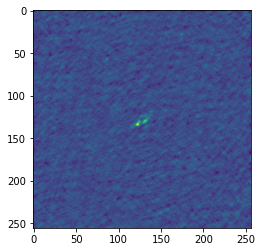

In [ ]:
# lets quickly plot slice 30
plt.imshow(d_2[30,:,:])

### Plot several slices of the data in one figure
- use subplots in matplotlib

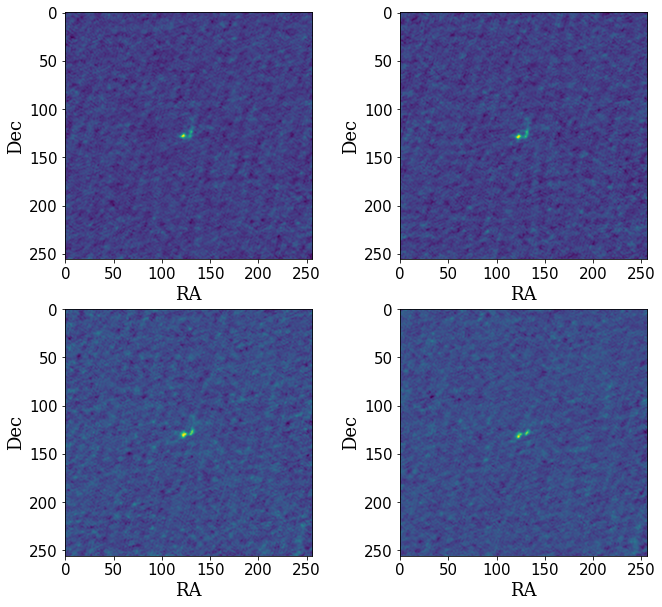

In [ ]:
fig = plt.figure(figsize=(11,10))

for j,i in enumerate(range(25,29), start=1):
    ax = fig.add_subplot(2,2,j)
    plt.imshow(d_2[i,:,:])
    ax.set_xlabel('RA', size=18,family='serif')
    ax.set_ylabel('Dec', size=18,family='serif')
    #plt.xlim([0,9])
    #plt.ylim([0,9])
    plt.xticks(fontsize=15)
    plt.yticks(fontsize=15)

plt.savefig(directory+'ngc4192_test.png')

### Plot one spatial axis and the frequency axis

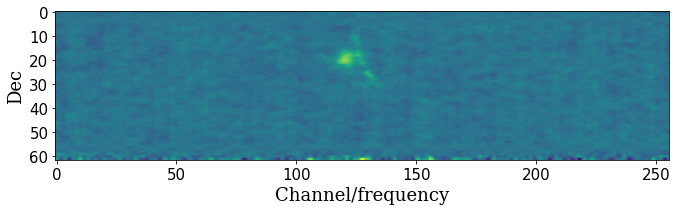

In [ ]:
fig = plt.figure(figsize=(11,10))

ax = fig.add_subplot(1,1,1)
plt.imshow(d_2[:,125,:])
ax.set_xlabel('Channel/frequency', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## Average some channels

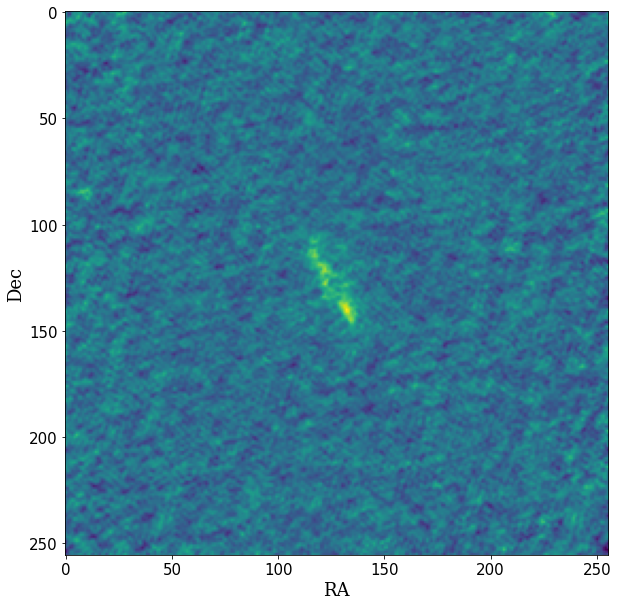

In [ ]:
fig = plt.figure(figsize=(11,10))

d_2_av = np.mean(d_2, axis=0)

ax = fig.add_subplot(1,1,1)
plt.imshow(d_2_av)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

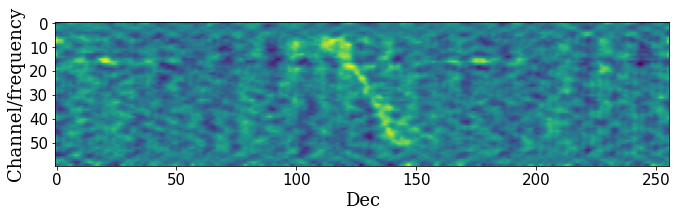

In [ ]:
fig = plt.figure(figsize=(11,8))

d_2_av2 = np.mean(d_2, axis=2) # axis 2 is the RA

ax = fig.add_subplot(1,1,1)
plt.imshow(d_2_av2[:-2,:])

ax.set_xlabel('Dec', size=18,family='serif')
ax.set_ylabel('Channel/frequency', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()

## Mask the cube
Mask the noisy pixels, i.e. pixles with signal to noise less than 3

### Calculate the rms of the data 
Thsi can be used for a treshold. For example 5 sigma is usually a good lower treshold for detection

In [ ]:
def calc_rms(x):
    rms = np.sqrt(np.mean(x**2))
    return rms

rms = calc_rms(d_2)
print(rms)

0.0013798041


In [ ]:
# Mask the cube, to only retain signal that is above 5 times the rms

d_3 = np.where(d_2 < 5*rms, 0, d_2)
print(d_3.shape)

(62, 256, 256)


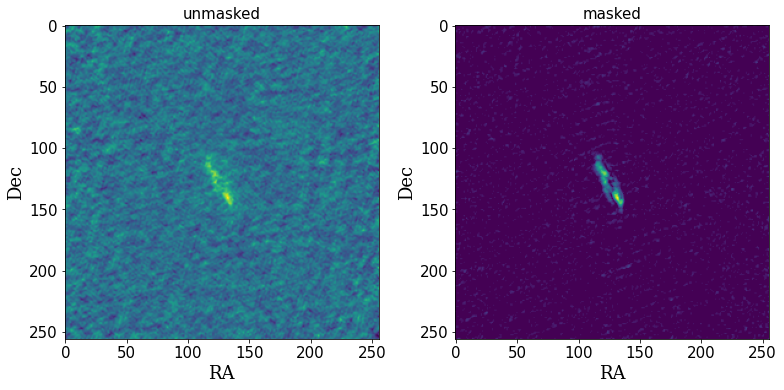

In [ ]:
fig = plt.figure(figsize=(11,10))

d_3_mom0 = np.sum(d_3, axis=0)* abs(h['CDELT3'])/1000  # this is the 0 orderd moment of the data also called moment 0

ax = fig.add_subplot(1,2,1)
plt.imshow(d_2_av)
plt.title('unmasked', fontsize=15)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax = fig.add_subplot(1,2,2)
plt.imshow(d_3_mom0)
plt.title('masked', fontsize=15)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()


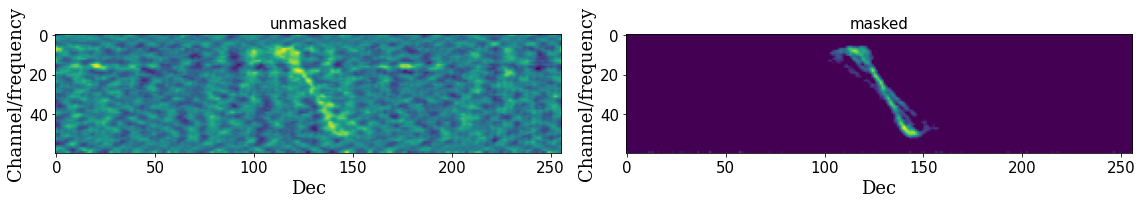

In [ ]:
fig = plt.figure(figsize=(16,8))

d_3_av = np.mean(d_3, axis=2)

ax = fig.add_subplot(1,2,1)
plt.imshow(d_2_av2[:-2,:])
plt.title('unmasked', fontsize=15)
ax.set_xlabel('Dec', size=18,family='serif')
ax.set_ylabel('Channel/frequency', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax = fig.add_subplot(1,2,2)
plt.imshow(d_3_av[:-2,:])
plt.title('masked', fontsize=15)
ax.set_xlabel('Dec', size=18,family='serif')
ax.set_ylabel('Channel/frequency', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.tight_layout()

plt.show()

### Save the integrated intensity map (moment 0 map)

In [ ]:
# saving data in a fits file

# first we define some values for the header
wcs_new = WCS(naxis=2)
wcs_new.wcs.cdelt = [h['CDELT1'], h['CDELT2']]
wcs_new.wcs.ctype = [h['CTYPE1'], h['CTYPE2']]
wcs_new.wcs.crval = [h['CRVAL1'], h['CRVAL2']]
wcs_new.wcs.crpix = [h['CRPIX1'], h['CRPIX2']]
header = wcs_new.to_header()

# add the data and the header to an object that can be written into a file
hdul_new = fits.PrimaryHDU(d_3_mom0, header=header)
hdul_new.writeto(directory+'mom0.fits', overwrite=True)

## Check the saved mom 0 map

In [ ]:
file = directory+'/mom0.fits'
hdul_mom0 = fits.open(file)
h_mom0 = hdul_mom0[0].header
d_mom0 = hdul_mom0[0].data

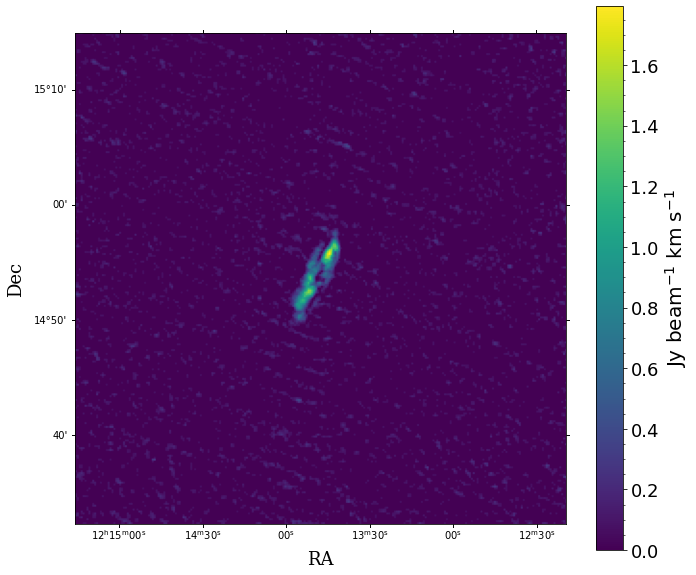

In [ ]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=WCS(h_mom0))  # by using the projection argument and the WCS package you can have the x and y axis in sky coordinates 
cb = plt.imshow(d_mom0)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cbar =fig.colorbar(cb)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel(r'Jy beam$^{-1}$ km s$^{-1}$', fontsize=20)

fig.show()


## Make an overlay on an optical image

For this we are going to grab an image from an online data base based on the coordinates of the HI data cube. Then we are going to grid the images to eachother to match the pixels and make the overlay.

In [ ]:
# get the central coordinate of the image

c = SkyCoord(h_mom0['CRVAL1'], h_mom0['CRVAL2'], unit="deg")
print(c.to_string('hmsdms'))

12h13m48.18055632s +14d53m42.46116972s


### retrieve optical image from an online archive
We are going to use skyview here

You can check the name of the available survey data here: https://astroquery.readthedocs.io/en/latest/skyview/skyview.html  (this is a list of names that can go into the survey argument)

And you can also use the skyview website directly to check if the particular survey has data for that galaxy: https://skyview.gsfc.nasa.gov/current/cgi/query.pl just type in the name or the coordinates of the galaxy and select the surveys you are interested in.

Genarrly the DSS2 Survey (2nd Digitised Sky Survey) is a good start since it covers the whole sky. 'Blue' referes to the band in which the data was taken. Blue is taken with a filter that lets trough the blue optical light from the galaxy.

(900, 900)
(256, 256)


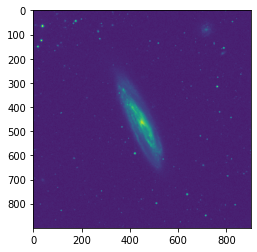

In [ ]:
# this line grabs the image from the remote server
path = SkyView.get_images(position=c.to_string('hmsdms'), width=0.3*u.deg, height=0.3*u.deg, survey=['DSS2 Blue'], pixels=[900,900])

# this line puts the data into a fits image
hdulist_opt = path[0]
d_opt = hdulist_opt[0].data
h_opt = hdulist_opt[0].header


# the dimensions of the data, not the same as the HI image!
print(d_opt.shape)
print(d_mom0.shape)

# quick look
plt.imshow(d_opt)


### Reproject the HI image onto the same pixel grid as the optical image

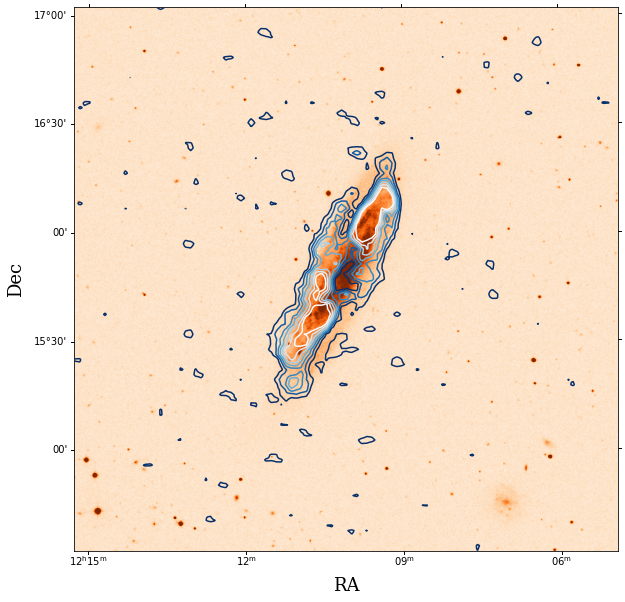

In [ ]:
# reproject the data onto the same pixel grid
# we are reprojecting the HI data onto the grid of the optical data, since the resolution of the optical data is better
hi_reprojected, footprint = reproject_interp(hdul_mom0, h_opt)

# calculate the rms of the reprojected HI data, to help drawing contours
rms_mom0 = calc_rms(hi_reprojected)

fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=WCS(h_mom0))
ax.imshow(d_opt, cmap='Oranges', vmax=np.percentile(d_opt, 99.8))
ax.contour(hi_reprojected, levels=np.arange(1,8)*rms_mom0, cmap='Blues_r')
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

fig.savefig(directory+'/ngc4192_mom0_overlay.png', dpi=200)

# Note that the HI disk is very similar in size to the stellar disk



## Plot the HI spectrum of the galaxy
- plot the spectrum of one spaxel in the data
- average the spectrum in a number of pixels
- average the spectrum based on a criteria (e.g. above 5 sigma detection)

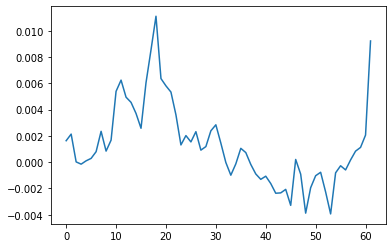

In [ ]:
# lets look at the spectrum in one pixel
plt.plot(d_2[:,125,125])


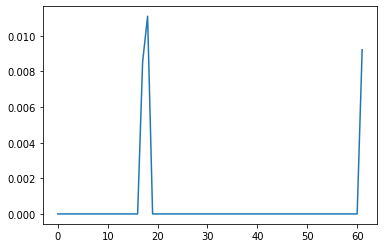

In [ ]:
# lets look at the spectrum in the masked data
plt.plot(d_3[:,125,125])

(62, 256)
3rd axis type FELO-HEL
3rd axis steps -10304.70703
3rd axis reference -160000.0
data units JY/BEAM


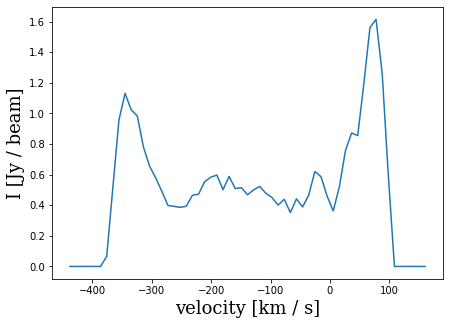

In [ ]:
# average for the whole cube, but make sure to take the masked data that does not have the noise anymore
# Note the tipical "dubble horn" shape of the profile, this is showing the rotation of the galaxy

d_av = np.sum(d_3[:,:,:], axis = 1)
print(d_av.shape)
d_av_3 = np.sum(d_av[:,:], axis = 1)
spectra = d_av_3[:-3]  

# checking the units of the spectral axis
print('3rd axis type', h['CTYPE3'])  # the third dimension of this cube is in heliocentric velocity
print('3rd axis steps', h['CDELT3']) # in m/s
print('3rd axis reference', h['CRVAL3']) # in m/s
print('data units', h['BUNIT'])

x_axis = (np.arange(0,len(spectra))*h['CDELT3']-h['CRVAL3']) / 1000 # we also convert to km/s from m/s

fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
plt.plot(x_axis, spectra)  # the last channel if the data cube is bad (with very high noise), so we don't include that in the plot
ax.set_xlabel('velocity [km / s]', size=18,family='serif')
ax.set_ylabel('I [Jy / beam]', size=18,family='serif')
plt.savefig(directory+'ngc4192_HI_spectra.png')

## Calculate the HI mass of the galaxy
A good information source on galaxies is the NASA/IPAC Extragalactic Data Base (NED): https://ned.ipac.caltech.edu/

If you search the galaxy NGC 4192, you will find various informatio on it, including: coordinates, optical magnitudes, optical diameter, distance measurments, optical velocity measurment, other names, morpthological identification etc. 

This is an extragalactic data base, so you can also search other catalogued galaxies in this data base.

In [ ]:
# First we need the integrated Flux of the galaxy
# We only want to integrate the non zero channels
spectra_2 = spectra[spectra > 0] 
chan_width = abs(h['CDELT3'])/1000

# The units of the data are Jy/beam, so we need to know the beam size
bmax = 18.26 # major axis of beam
bmin = 16.03 # minor axis of beam in arcsec 

beam_px = (np.pi * (bmax/3600/h['CDELT2']) * (bmin/3600/h['CDELT2'])) / (4 * np.log(2))  # beam size in pixels

S_int = np.sum(spectra * chan_width / beam_px)  # integrate the spectra in km/s, final unit needs to be in Jy
print(S_int)

92.27826


In [ ]:
# isolate the velocities for the spectral line
vel_line = x_axis[np.where(spectra > 0)]
print(vel_line)

# calculate the line centre
line_centre = (vel_line[0] + abs(vel_line[-1]))/2 + vel_line[-1]
print(line_centre)

v_opt_0 = -142.1 # systemic velocity of the galaxy in the optical velocity frame from the NED data base 

# note that this galaxy has a negative optical velocity. This means that it is moving tovards the Milky Way and not away from it. 
# In practice, this means that the Milky Way is moving towards the Virgo cluster.
# Only very nearby galaxies have negative velocities.

[  98.17175782   87.86705079   77.56234376   67.25763673   56.9529297
   46.64822267   36.34351564   26.03880861   15.73410158    5.42939455
   -4.87531248  -15.18001951  -25.48472654  -35.78943357  -46.0941406
  -56.39884763  -66.70355466  -77.00826169  -87.31296872  -97.61767575
 -107.92238278 -118.22708981 -128.53179684 -138.83650387 -149.1412109
 -159.44591793 -169.75062496 -180.05533199 -190.36003902 -200.66474605
 -210.96945308 -221.27416011 -231.57886714 -241.88357417 -252.1882812
 -262.49298823 -272.79769526 -283.10240229 -293.40710932 -303.71181635
 -314.01652338 -324.32123041 -334.62593744 -344.93064447 -355.2353515
 -365.54005853 -375.84476556]
-138.83650387


### Calculate the distance to the galaxy

The Hubble flow distance: $D_{hf} = \frac{|v_{opt}|}{ h_{0}} $

where $v_{opt}$ is the velocity (based on redshift) of the galaxy in the optical frame, and  $h_{0}$ is the Hubble constant.

In [ ]:
H_0 = 70 # Hubble constant

v_opt_line = line_centre # (the middle of the integrated line profile)

distance_hf = abs(v_opt_line) / H_0   # This is the way to calculate the hubble flow distance to galaxies
distance = 16 # in MPc - in the case of this galaxy the hubble flow distances are not accurate because the galaxy has a relatively large peculiar motion compared to its systematic velocity
# for this tutorial we will use 16 MPc for the distance of all Virgo cluster galaxies

print('Comapring hubble flow distance to Virgo cluster distance:', distance_hf, distance)


Comapring hubble flow distance to Virgo cluster distance: 1.9833786267142857 16


The HI mass of a galaxy: $M_{HI} = 2.36 \times 10^{5} S_{int} * D^{2}$ where $S_{int}$ is the integrated HI flux and $D$ is the distance to the galaxy in Mpc. 

In [ ]:
# Now calculating the HI mass of the galaxy

m_HI = 2.36 * 10**5 * S_int * distance**2
print(r'HI mass in units of 10$^{8} M_{sun}$:', m_HI/10**8)

HI mass in units of 10$^{8} M_{sun}$: 55.750833125


## Making a map of the velocity field (moment 1)

A moment 1 map is the intensity weighted velocity field of the galaxy. $\int{v I_{v} dv}$

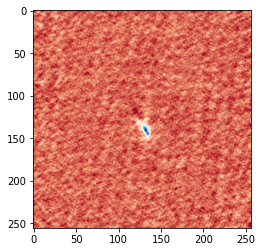

In [ ]:
d_3 = d_2.copy()

for i in range(len(x_axis)):
    d_3[i,:,:] = x_axis[i] * d_3[i,:,:]

d_3_mom1 = np.sum(d_3, axis=0)* abs(h['CDELT3'])/1000  # this is the moment 1 map of the data


plt.imshow(d_3_mom1, cmap = 'RdBu_r')

In [ ]:
# the moment 1 map is a bit noisy, so we will apply a mask that only keeps the part that overlaps with the integrated intensity map (moment 0)
 
mom0_mask = np.array(d_mom0) 
mom0_mask[mom0_mask < 0.5] = 'nan'  # set the noise to nan
mom0_mask[mom0_mask > 0.5] = 1

mom1_clean = np.array(d_3_mom1)* mom0_mask

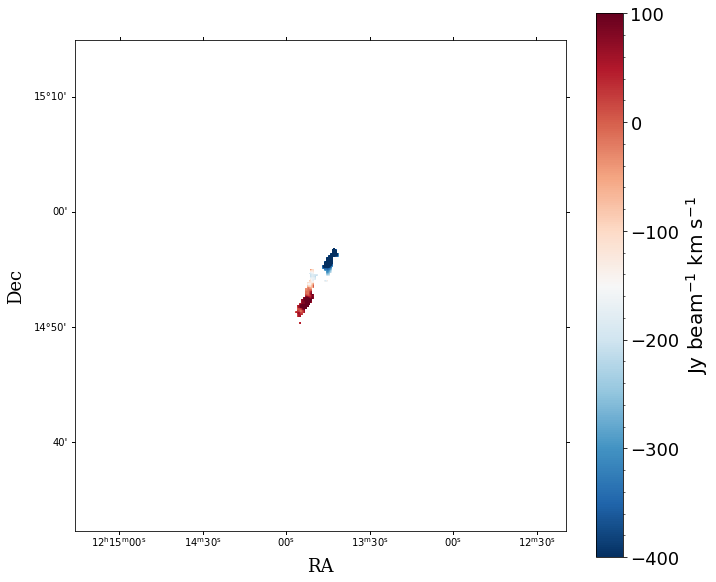

In [ ]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=(WCS(h_mom0)))
cb = plt.imshow(mom1_clean, cmap='RdBu_r', vmin = -400, vmax = 100)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cbar =fig.colorbar(cb)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel(r'Jy beam$^{-1}$ km s$^{-1}$', fontsize=20)
plt.show()

# the rotation of the gas in the galaxy is clearly visible

## Spectral Cube Python package

The is also a handy python package called spectral cube, that makes things a bit easier. https://spectral-cube.readthedocs.io/en/latest/

In [ ]:
# reading in the data cube using spectral cube

cube = SpectralCube.read(directory+'ngc4192.cube.fits')

# converting the velocity axis to km/s
cube_2 = cube.with_spectral_unit(u.km/u.s, velocity_convention='optical', rest_value=1.420405752 * u.GHz) 


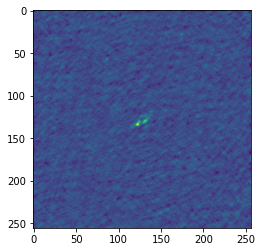

In [ ]:
# checking one of the velocity slices of the cube

cube_2[30,:,:].quicklook()

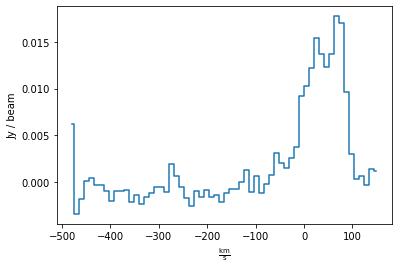

In [ ]:
# checking the spectrum in a pixel

cube_2[:,120,120].quicklook()

In [ ]:
# Makibg a moment 0 map

subcube = cube_2.spectral_slab(-490*u.km/u.s,100*u.km/u.s)
mom0 = subcube.moment(order=0)  # this creates a similar object to that what is in a fits file. There is a header and a data part
print(mom0.shape)

(256, 256)


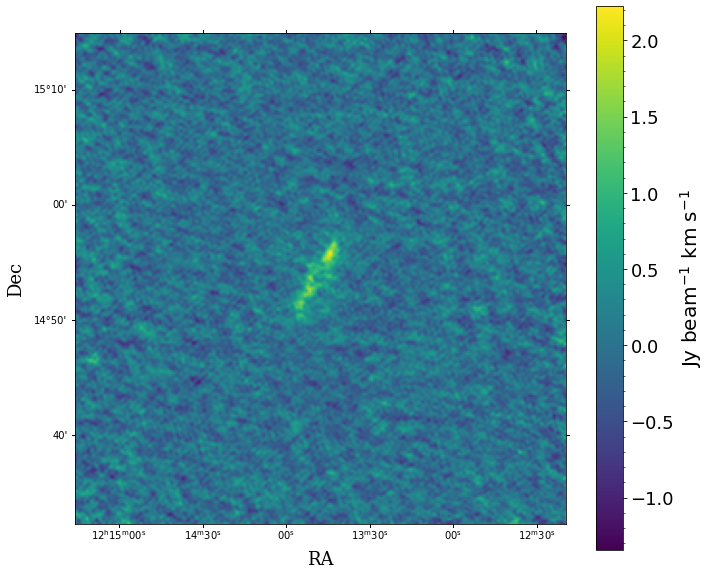

In [ ]:
fig = plt.figure(figsize=(11,10))
ax = fig.add_subplot(1,1,1, projection=(WCS(mom0.header)))
cb = plt.imshow(mom0.data)
ax.set_xlabel('RA', size=18,family='serif')
ax.set_ylabel('Dec', size=18,family='serif')
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

cbar =fig.colorbar(cb)
cbar.minorticks_on()
cbar.ax.tick_params(labelsize=18) 
cbar.ax.set_ylabel(r'Jy beam$^{-1}$ km s$^{-1}$', fontsize=20)
fig.show()

# Homework

1) Write a function that calculates the mass of NGC 4321.

The data is available here: http://www.astro.yale.edu/cgi-bin/viva/galaxy.cgi?ngc4321 (Download the "Cleaned cube")

Note the different "beam size" compared to NGC 4192. The beam size information is on the webpage of the data.

Use the same distance in Mpc as for NGC 4192.

2) Make a plot of the spectrum of NGC 4321.

3) Make a function (or combine several functions) that plots the moment 0 and the moment 1 map of NGC 4321.

4) Make an overlay of the HI data on an optical image and a UV image (you can use the GALEX near UV data from SkyView for the UV image).

